<a href="https://colab.research.google.com/github/TobyYang1997/thc_Astrafy/blob/main/thc_Astrafy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [28]:
from google.cloud import bigquery

In [27]:
project_id = 'thc-astrafy'

In [29]:
client = bigquery.Client(project=project_id)

In [30]:
dataset_ref = client.dataset("balance_update", project=project_id)
dataset = client.get_dataset(dataset_ref)

In [31]:
tables = list(client.list_tables(dataset))

In [33]:
#creat reference for the table
table_ref = dataset_ref.table('balance')

In [34]:
#retrieve the table
table = client.get_table(table_ref)

In [36]:
#preview
client.list_rows(table, max_results=5).to_dataframe()

,address,type,balance
0,bitcoincash:qz7xc0vl85nck65ffrsx5wvewjznp9lflg...,pubkeyhash,124702516166506
1,bitcoincash:qpagr634w55t4wp56ftxx53xukhqgl24ys...,pubkeyhash,49688909940000
2,bitcoincash:qq4adtxqxj7uqpee6zd3mw9ftenx649szc...,pubkeyhash,35231900798802
3,bitcoincash:pqv53dwyatxse2xh7nnlqhyr6ryjgfdtag...,scripthash,22899907387202
4,bitcoincash:qp028nlln35nwnv5a9dssw9w57z5n765rg...,pubkeyhash,20935171558065


In [38]:
#extract data from bq
%%bigquery --project thc-astrafy df
SELECT 
  DATE(block_timestamp) AS DateOnly,
  COUNT(*) as Amount_of_transactions
FROM `bigquery-public-data.crypto_bitcoin_cash.transactions`
WHERE DATE(block_timestamp) BETWEEN DATE_SUB(CURRENT_DATE(), INTERVAL 3 MONTH) AND CURRENT_DATE()
GROUP BY DateOnly
ORDER BY DateOnly ASC

In [39]:
#preview
df.head(5)

,DateOnly,Amount_of_transactions
0,2022-05-23,29464
1,2022-05-24,28910
2,2022-05-25,29456
3,2022-05-26,36066
4,2022-05-27,29978


In [56]:
#convert columns to series
date = df['DateOnly'].squeeze()
Amount_of_transactions = df['Amount_of_transactions'].squeeze()

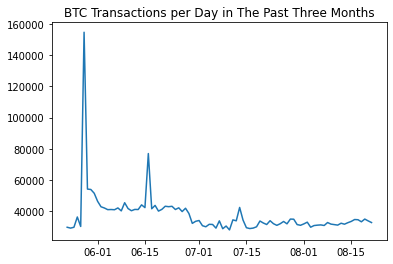

In [60]:
#plot the graph
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title('BTC Transactions per Day in The Past Three Months')
plt.plot(date, Amount_of_transactions)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))